In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'new-plant-diseases-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F78313%2F182633%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240702%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240702T063920Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9a36894be9bc308bc29f187ad14a3d789f90b01253b184efcecd0c9b8b5e04cb3dad7b765d509443f4709a24219633dd9a386bbe45ec2a799865e13797302d093f28c55ec94787edcafaa8f4a3afb9fe7b694e74caf74ecae9dd7e486f140d6552ddca3eb35e402409efcaaf2b4faa5d0623aefbfbf9e08c71f8dc83bd7a893209b6274762121f7001450693db41f00934b15ff475341787f9469f3c6851cba7fb1009be57476d3fc3b348a23a81b88fe775714b44232b8e54ae434a7600f903c525a71d26a9f5e081336d30cb1641c207fc44f30904afd5e6b6a05f11a18057439d238823f71723685d9c487753a58bb6c2657dd2783a543f39bcc39c9791ed'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2897709187 bytes downloaded
Downloaded and uncompressed: new-plant-diseases-dataset
Data source import complete.


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

## Training Set

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [ ]:
training_set

In [ ]:
for x,y in training_set:
    print(x.shape)
    print(y.shape)
    break

## Validation Set

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


# Building The Model

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
## Building Convolution layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Dropout(0.25)) # To prevent overfitting

In [ ]:
# FLattening

model.add(Flatten())

In [ ]:
model.add(Dense(units=1500, activation='relu'))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
# Output layer

model.add(Dense(units=38, activation='softmax'))

# Compiling Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [ ]:
training_history = model.fit(training_set, epochs=10, validation_data=validation_set)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 59ms/step - accuracy: 0.3799 - loss: 2.2053 - val_accuracy: 0.8242 - val_loss: 0.5447
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 126s 57ms/step - accuracy: 0.8242 - loss: 0.5518 - val_accuracy: 0.9063 - val_loss: 0.2972
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 118s 54ms/step - accuracy: 0.9032 - loss: 0.2981 - val_accuracy: 0.9487 - val_loss: 0.1567
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 150s 57ms/step - accuracy: 0.9321 - loss: 0.2066 - val_accuracy: 0.9356 - val_loss: 0.2060
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 126s 57ms/step - accuracy: 0.9507 - loss: 0.1506 - val_accuracy: 0.9494 - val_loss: 0.1603
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9627 - loss: 0.1096 - val_accuracy: 0.9588 - val_loss: 0.1284
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9690 - loss: 0.0943 - val_accuracy: 0.9456 - val_loss: 0.1890
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 126s 58ms/step - accuracy: 

# Model Evaluation

In [ ]:
train_loss, train_accuracy = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.9924 - loss: 0.0263


In [ ]:
val_loss, val_accuracy = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9690 - loss: 0.1008


## Accuracy Visualization

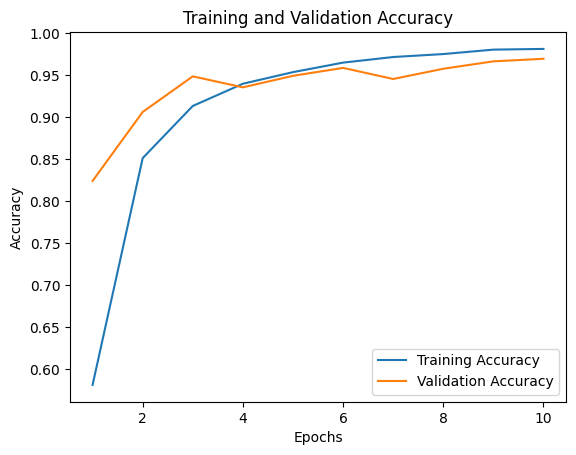

In [ ]:
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluation Metrics

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step


In [ ]:
y_pred

array([[9.9988604e-01, 1.1250954e-04, 1.5306256e-08, ..., 1.5849937e-13,
        9.1576334e-13, 1.2899101e-11],
       [9.9999988e-01, 1.0906096e-07, 7.5329057e-12, ..., 4.7469394e-20,
        3.4223466e-17, 1.1523052e-17],
       [9.9999118e-01, 6.8327731e-06, 7.6034723e-08, ..., 6.9782781e-13,
        1.1664155e-11, 1.3873803e-09],
       ...,
       [4.2026037e-13, 1.6910621e-14, 1.2605968e-10, ..., 9.9971930e-13,
        1.2790605e-12, 1.0000000e+00],
       [1.0076512e-10, 1.5354803e-13, 8.6040082e-09, ..., 2.0156569e-10,
        6.8847955e-11, 9.9999583e-01],
       [2.3619629e-11, 3.4622449e-13, 4.4830446e-12, ..., 5.3786892e-12,
        2.4183565e-12, 9.9999952e-01]], dtype=float32)

In [ ]:
predicted_categories = np.argmax(y_pred, axis=1)

In [ ]:
predicted_categories

array([ 0,  0,  0, ..., 37, 37, 37])

In [ ]:
actual_categories = tf.concat([y for x, y in test_set], axis=0)

In [ ]:
actual_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
y_true = np.argmax(actual_categories, axis=1)
y_true

array([ 0,  0,  0, ..., 37, 37, 37])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, predicted_categories))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       504
           1       0.98      0.98      0.98       497
           2       0.97      0.99      0.98       440
           3       0.95      0.99      0.97       502
           4       0.99      0.97      0.98       454
           5       0.98      0.99      0.98       421
           6       0.98      0.99      0.99       456
           7       0.91      0.98      0.94       410
           8       1.00      0.97      0.99       477
           9       0.98      0.94      0.96       477
          10       0.99      0.99      0.99       465
          11       0.97      1.00      0.98       472
          12       1.00      0.97      0.99       480
          13       1.00      0.99      1.00       430
          14       0.99      1.00      0.99       423
          15       0.99      0.98      0.99       503
          16       0.97      0.97      0.97       459
          17       0.97    

In [ ]:
cm = confusion_matrix(y_true, predicted_categories)
cm

array([[490,   2,   0, ...,   0,   0,   0],
       [  2, 489,   0, ...,   0,   0,   0],
       [  0,   1, 435, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 482,   0,   0],
       [  4,   0,   0, ...,   0, 436,   1],
       [  0,   0,   1, ...,   0,   0, 475]])

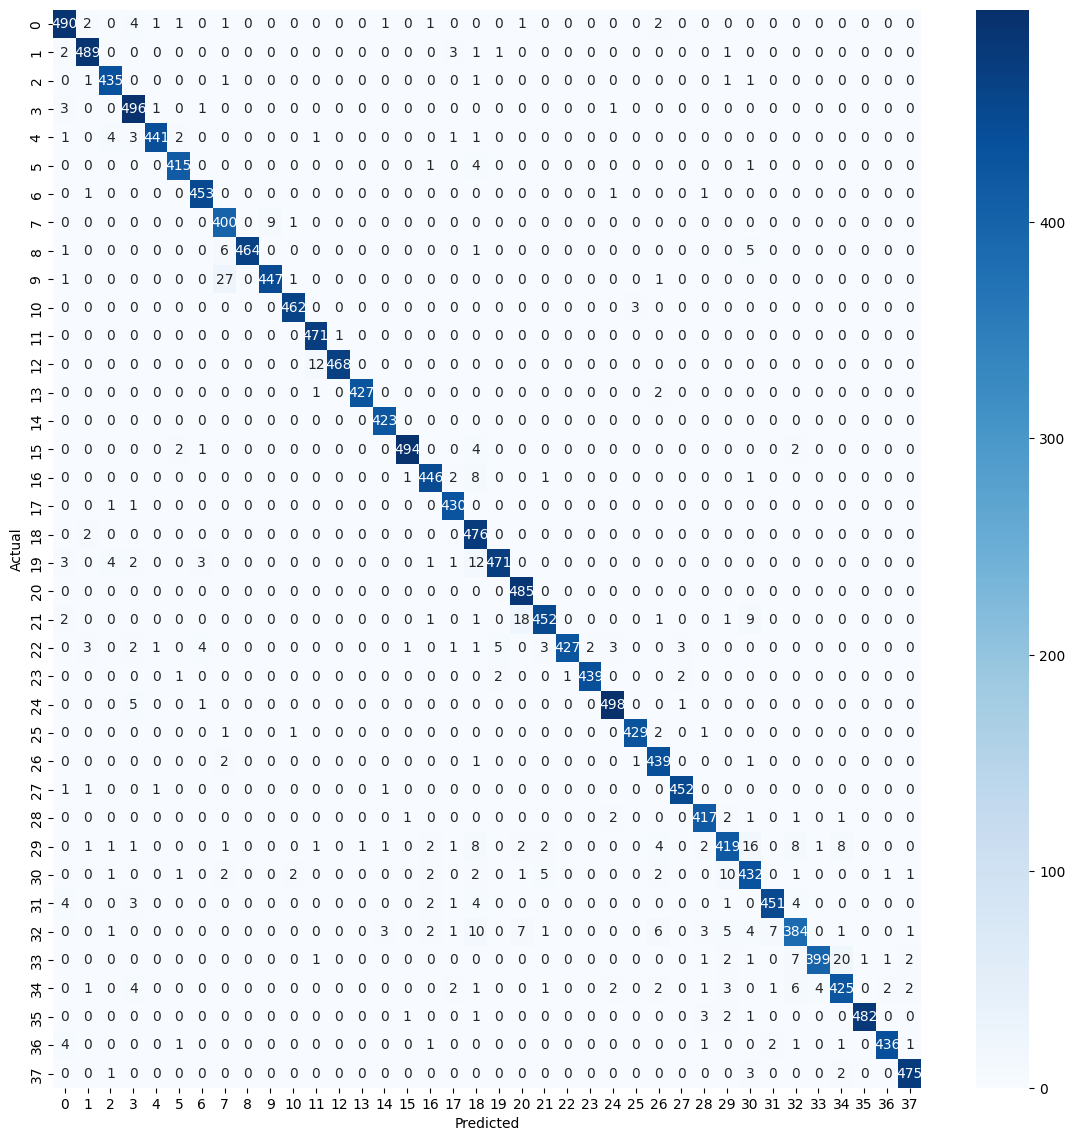

In [ ]:
plt.figure(figsize=(14, 14))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Saving the Model

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/models/plant_disease_model.keras')

In [ ]:
# Saving training history

import json

with open('/content/drive/MyDrive/models/training_history.json', 'w') as f:
    json.dump(training_history.history, f)